In [6]:
#https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFTGate
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
from qiskit_aer import AerSimulator
import math
from math import pi, cos, sin
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

theta = 0.7
m = 10  # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2 * pi * theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFTGate(m).inverse(),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
#display(qc.draw('mpl'))

In [7]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import transpile

backend = AerSimulator()

qc_transpiled = transpile(qc, backend)
sampler = Sampler(mode=backend)
job = sampler.run([qc_transpiled])

result = job.result()

counts = result[0].data.Result.get_counts()

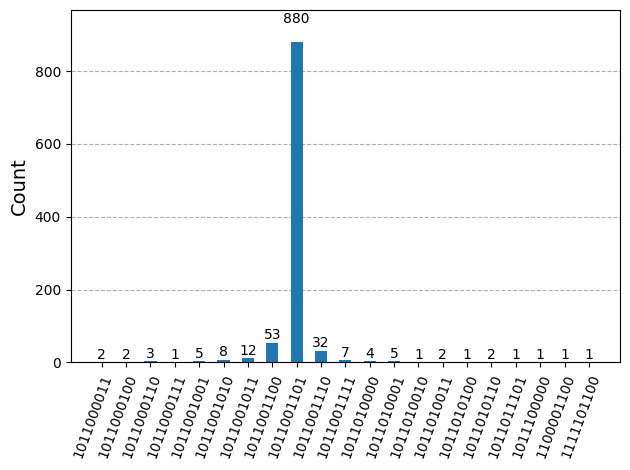

In [8]:
display(plot_histogram(counts))

In [9]:
most_probable = int(max(counts, key=counts.get), 2)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")

Most probable output: 717
Estimated theta: 0.7001953125


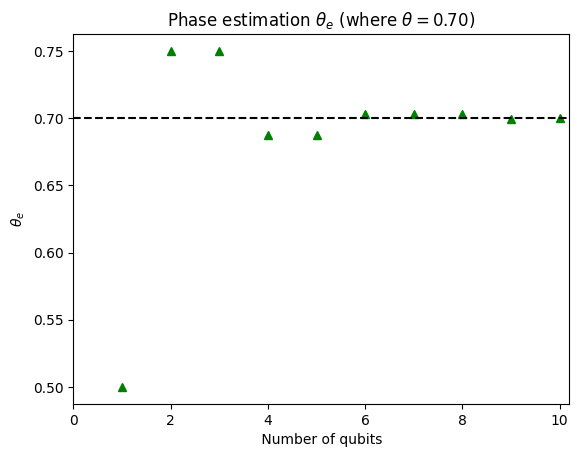

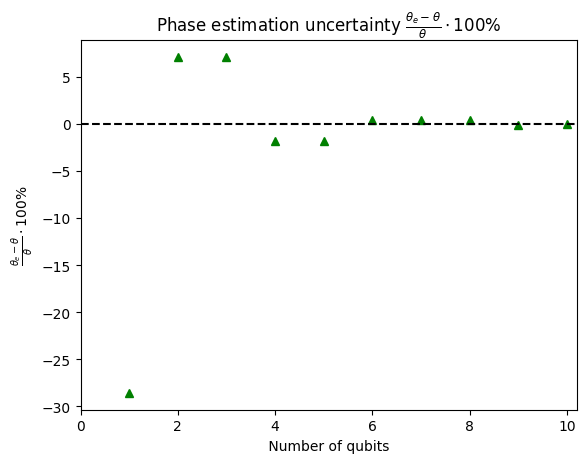

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
DaneY1=[0.5,0.75,0.75,0.6875,0.6875,0.703125,0.703125,0.703125,0.69921875,0.7001953125]
DaneX=[1,2,3,4,5,6,7,8,9,10]
DaneY2=[]
for i in range(len(DaneY1)):
    DaneYX=((DaneY1[i]-theta)/theta) *100
    DaneY2.append(DaneYX)
plt.title(u'Phase estimation $\\theta_e$ (where $\\theta=0.70$)')
plt.xlabel(r' Number of qubits ')
plt.ylabel(r'$\theta_e$')
plt.xlim([0, m+0.2])
plt.plot(DaneX,DaneY1, 'g^')
plt.hlines(y=0.70,xmin=0.0,xmax=m+0.2, colors='k', linestyles='dashed')
#path and filename of the file to plot:
outputfile = 'Phase_estimation_1_'+str(m)+'.png'
#saves the plot as pdf file in "outputfile":
plt.savefig(outputfile, dpi=300, format='png')  
plt.show()
plt.clf()


plt.title(r'Phase estimation uncertainty $\frac{\theta_e - \theta}{\theta} \cdot 100\%$')
plt.xlabel(r' Number of qubits ')
plt.ylabel(r'$\frac{\theta_e - \theta}{\theta} \cdot 100\%$')
plt.xlim([0, m+0.2])
plt.plot(DaneX,DaneY2, 'g^')
plt.hlines(y=0.0,xmin=0.0,xmax=m+0.2, colors='k', linestyles='dashed')
#path and filename of the file to plot:
outputfile = 'Phase_estimation_2_'+str(m)+'.png'
#saves the plot as pdf file in "outputfile":
plt.savefig(outputfile, dpi=300, format='png')  
plt.show()
plt.clf()